In [1]:
from vivarium import InteractiveContext, Artifact

from datetime import datetime, timedelta
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd, numpy as np
pd.set_option('display.max_rows', 60)

import numpy as np
import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.backends.backend_pdf import PdfPages

from db_queries import get_outputs as go
from db_queries import get_ids
from get_draws.api import get_draws

## Load in Data and First Time Step

In [2]:
path = Path('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')
path

PosixPath('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')

In [3]:
sim = InteractiveContext(Path(path), setup=False)
sim.configuration.update({
                          'input_data':
                              {'input_draw_number': 29,
                              },
                          'randomness':
                              {'random_seed': 10,
                              },
                          'population':
                              {'population_size': 10_000,
                              },
                          'population':
                              {'age_start': 75,
                              },
                          'time':
                              {'start':
                                  {'year': 2021
                                  }
                              }
                          }
                        )
sim.setup()

2023-06-15 12:41:40.511 | INFO     | simulation_1-artifact_manager:66 - Running simulation from artifact located at /mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf.
2023-06-15 12:41:40.513 | INFO     | simulation_1-artifact_manager:67 - Artifact base filter terms are ['draw == 29'].
2023-06-15 12:41:40.518 | INFO     | simulation_1-artifact_manager:68 - Artifact additional filter terms are None.


/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warnin

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warnin

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warnin

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warnin

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:78: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:223: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warnin

In [4]:
pop0 = sim.get_population()
pop0.head()

,tracked,sex,alive,location,entrance_time,exit_time,age,years_of_life_lost,cause_of_death,years_lived_with_disability,...,post_myocardial_infarction_event_time,post_myocardial_infarction_event_count,transient_post_myocardial_infarction_event_count,transient_post_myocardial_infarction_event_time,heart_failure_from_ischemic_heart_disease_event_time,heart_failure_from_ischemic_heart_disease_event_count,acute_myocardial_infarction_and_heart_failure_event_time,acute_myocardial_infarction_and_heart_failure_event_count,heart_failure_residual_event_time,heart_failure_residual_event_count
0,True,Male,alive,Alabama,2020-12-04,NaT,81.699815,0.0,not_dead,0.0,...,NaT,0,0,NaT,NaT,0,NaT,0,NaT,0
1,True,Female,alive,Alabama,2020-12-04,NaT,85.170378,0.0,not_dead,0.0,...,2020-12-04,0,0,NaT,NaT,0,NaT,0,NaT,0
2,True,Male,alive,Alabama,2020-12-04,NaT,80.191594,0.0,not_dead,0.0,...,NaT,0,0,NaT,NaT,0,NaT,0,NaT,0
3,True,Female,alive,Alabama,2020-12-04,NaT,76.731164,0.0,not_dead,0.0,...,NaT,0,0,NaT,NaT,0,NaT,0,NaT,0
4,True,Male,alive,Alabama,2020-12-04,NaT,84.021498,0.0,not_dead,0.0,...,NaT,0,0,NaT,NaT,0,NaT,0,2020-12-04,0


In [5]:
data1 = pd.concat([pop0,
                   sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl'),
                   sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index).rename('high_sbp'),
                   sim.get_value('high_body_mass_index_in_adults.exposure')(pop0.index).rename('high_bmi'),
                   sim.get_value('high_fasting_plasma_glucose.exposure')(pop0.index).rename('high_fpg'),
                   #sim.get_value('heart_failure_from_ischemic_heart_disease.incidence_rate')(pop0.index).rename('hf_ihd'),
                   #sim.get_value('heart_failure_residual.incidence_rate')(pop0.index).rename('hf_resid'),
                   #sim.get_value('acute_myocardial_infarction.incidence_rate')(pop0.index).rename('acute_mi'),
                  ], axis=1)
data1.head()

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warnin

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)
/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warnin

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/vivarium/interpolation.py:119: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  sub_tables = list(sub_tables)


,tracked,sex,alive,location,entrance_time,exit_time,age,years_of_life_lost,cause_of_death,years_lived_with_disability,...,heart_failure_from_ischemic_heart_disease_event_time,heart_failure_from_ischemic_heart_disease_event_count,acute_myocardial_infarction_and_heart_failure_event_time,acute_myocardial_infarction_and_heart_failure_event_count,heart_failure_residual_event_time,heart_failure_residual_event_count,high_ldl,high_sbp,high_bmi,high_fpg
0,True,Male,alive,Alabama,2020-12-04,NaT,81.699815,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,0,1.708683,157.918532,30.791850,5.491635
1,True,Female,alive,Alabama,2020-12-04,NaT,85.170378,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,0,1.971831,145.121139,29.351206,8.115985
2,True,Male,alive,Alabama,2020-12-04,NaT,80.191594,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,0,2.107563,133.498916,27.506122,7.757213
3,True,Female,alive,Alabama,2020-12-04,NaT,76.731164,0.0,not_dead,0.0,...,NaT,0,NaT,0,NaT,0,2.852157,182.901313,22.647416,6.549133
4,True,Male,alive,Alabama,2020-12-04,NaT,84.021498,0.0,not_dead,0.0,...,NaT,0,NaT,0,2020-12-04,0,1.695771,187.954123,32.964072,4.984856


In [6]:
1-(len(data1.loc[(data1.alive == 'alive') & (data1.ldlc_medication == 'no_treatment')])/len(data1.loc[(data1.alive == 'alive')]))

AttributeError: 'DataFrame' object has no attribute 'ldlc_medication'

In [9]:
data1.loc[data1.sex=='Female'].high_ldl.describe(percentiles=[0.4,0.5,0.6,0.7,0.8])

count    29806.000000
mean         3.001386
std          0.987637
min          0.000000
40%          2.689150
50%          2.940340
60%          3.195003
70%          3.478856
80%          3.822639
max          5.500000
Name: high_ldl, dtype: float64

In [10]:
data1.loc[data1.sex=='Male'].high_ldl.describe(percentiles=[0.4,0.5,0.6,0.7,0.8])

count    20194.000000
mean         2.663361
std          0.874590
min          0.000000
40%          2.391691
50%          2.612977
60%          2.835201
70%          3.075510
80%          3.367349
max          5.500000
Name: high_ldl, dtype: float64

In [8]:
data1.loc[data1.sex=='Male'].high_ldl.median()

2.4559542575314346

In [9]:
sim_data = pd.DataFrame()
for step in list(range(0,10)):
    sim.step()
    pop_t = sim.get_population()
    data_t = pd.concat([pop_t, 
                   sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl')],
                   #sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index).rename('high_sbp'),
                   #sim.get_value('high_body_mass_index_in_adults.exposure')(pop0.index).rename('high_bmi'),
                   #sim.get_value('high_body_mass_index_in_adults.propensity')(pop0.index).rename('bmi_propensity'),
                   #sim.get_value('high_fasting_plasma_glucose.exposure')(pop0.index).rename('high_fpg'),
                   #sim.get_value('high_systolic_blood_pressure.propensity')(pop0.index).rename('sbp_propensity')],                       
                       axis=1)
    data_t['step'] = step
    sim_data = pd.concat([sim_data, data_t])

2023-05-05 11:47:50.451 | DEBUG    | vivarium.framework.engine:step:172 - 2021-01-01 00:00:00
2023-05-05 11:49:05.093 | DEBUG    | vivarium.framework.engine:step:172 - 2021-01-29 00:00:00
2023-05-05 11:50:19.665 | DEBUG    | vivarium.framework.engine:step:172 - 2021-02-26 00:00:00
2023-05-05 11:51:33.957 | DEBUG    | vivarium.framework.engine:step:172 - 2021-03-26 00:00:00
2023-05-05 11:52:47.512 | DEBUG    | vivarium.framework.engine:step:172 - 2021-04-23 00:00:00
2023-05-05 11:54:00.636 | DEBUG    | vivarium.framework.engine:step:172 - 2021-05-21 00:00:00
2023-05-05 11:55:14.538 | DEBUG    | vivarium.framework.engine:step:172 - 2021-06-18 00:00:00
2023-05-05 11:56:28.673 | DEBUG    | vivarium.framework.engine:step:172 - 2021-07-16 00:00:00
2023-05-05 11:57:41.602 | DEBUG    | vivarium.framework.engine:step:172 - 2021-08-13 00:00:00
2023-05-05 11:58:54.254 | DEBUG    | vivarium.framework.engine:step:172 - 2021-09-10 00:00:00


In [10]:
meds = (sim_data
                .groupby(['step', 'sex','ldlc_medication'])
                .alive.count()
                .reset_index())
meds

,step,sex,ldlc_medication,alive
0,0,Female,high_intensity,1978
1,0,Female,high_with_eze,272
2,0,Female,low_intensity,5191
3,0,Female,low_med_with_eze,907
4,0,Female,medium_intensity,6174
...,...,...,...,...
115,9,Male,high_with_eze,2343
116,9,Male,low_intensity,3664
117,9,Male,low_med_with_eze,1334
118,9,Male,medium_intensity,2038


In [22]:
meds.loc[(meds.ldlc_medication=='no_treatment') & (meds.sex == 'Female') & (meds.step == 0)].alive

5    15284
Name: alive, dtype: int64

In [20]:
meds.loc[(meds.sex == 'Female') & (meds.step == 0)].alive.sum()

29806

In [23]:
15284/29806

0.5127826612091525

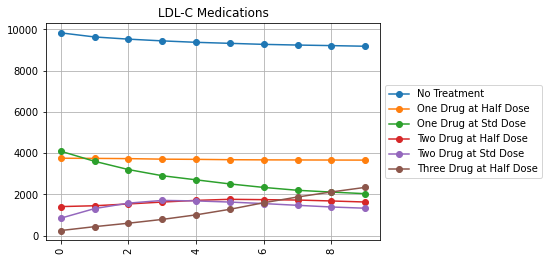

In [14]:
no_trt = meds.loc[(meds.ldlc_medication=='no_treatment') & (meds.sex == 'Male')]
plt.plot(no_trt['step'], no_trt['alive'], marker='o')
low = meds.loc[(meds.ldlc_medication=='low_intensity') & (meds.sex == 'Male')]
plt.plot(low['step'], low['alive'], marker='o')
medium = meds.loc[(meds.ldlc_medication=='medium_intensity') & (meds.sex == 'Male')]
plt.plot(medium['step'], medium['alive'], marker='o')
high = meds.loc[(meds.ldlc_medication=='high_intensity') & (meds.sex == 'Male')]
plt.plot(high['step'], high['alive'], marker='o')
low_eze = meds.loc[(meds.ldlc_medication=='low_med_with_eze') & (meds.sex == 'Male')]
plt.plot(low_eze['step'], low_eze['alive'], marker='o')
high_eze = meds.loc[(meds.ldlc_medication=='high_with_eze') & (meds.sex == 'Male')]
plt.plot(high_eze['step'], high_eze['alive'], marker='o')
plt.title(f'LDL-C Medications') 
plt.xticks(rotation=90)
plt.legend(['No Treatment', 'One Drug at Half Dose', 'One Drug at Std Dose','Two Drug at Half Dose','Two Drug at Std Dose', 'Three Drug at Half Dose','Three Drug at Std Dose'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

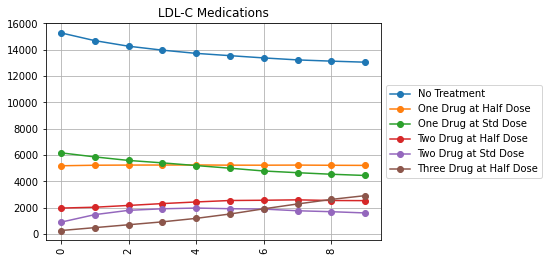

In [15]:
no_trt = meds.loc[(meds.ldlc_medication=='no_treatment') & (meds.sex == 'Female')]
plt.plot(no_trt['step'], no_trt['alive'], marker='o')
low = meds.loc[(meds.ldlc_medication=='low_intensity') & (meds.sex == 'Female')]
plt.plot(low['step'], low['alive'], marker='o')
medium = meds.loc[(meds.ldlc_medication=='medium_intensity') & (meds.sex == 'Female')]
plt.plot(medium['step'], medium['alive'], marker='o')
high = meds.loc[(meds.ldlc_medication=='high_intensity') & (meds.sex == 'Female')]
plt.plot(high['step'], high['alive'], marker='o')
low_eze = meds.loc[(meds.ldlc_medication=='low_med_with_eze') & (meds.sex == 'Female')]
plt.plot(low_eze['step'], low_eze['alive'], marker='o')
high_eze = meds.loc[(meds.ldlc_medication=='high_with_eze') & (meds.sex == 'Female')]
plt.plot(high_eze['step'], high_eze['alive'], marker='o')
plt.title(f'LDL-C Medications') 
plt.xticks(rotation=90)
plt.legend(['No Treatment', 'One Drug at Half Dose', 'One Drug at Std Dose','Two Drug at Half Dose','Two Drug at Std Dose', 'Three Drug at Half Dose','Three Drug at Std Dose'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()